<a href="https://colab.research.google.com/github/zdhiman/breweries/blob/main/companions_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

# filename = "/content/Companions.xlsx"
filename = "https://github.com/zdhiman/breweries/blob/main/Companions.xlsx?raw=true"
cols = ['REV', 'MAN', 'STA', 'TYP', 'INCOME', 'COM']
df = pd.read_excel(filename, header=1, usecols=cols)

print(f"Length of dataset: {len(df)}")
df.sample(5)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Length of dataset: 47


,REV,MAN,STA,TYP,INCOME,COM
4,9.41,3,7,1,7.90,0.96
43,8.55,6,5,0,12.30,0.64
14,9.41,6,5,1,13.00,0.98
28,17.65,9,3,1,7.00,0.65
40,5.85,4,7,0,9.98,0.74


In [2]:
df["INCOME"].min()

7.0

In [3]:
df['INCOME_sq'] = df["INCOME"]*df["INCOME"]
df['MAN_sq'] = df["MAN"]*df["MAN"]
df["INCOME_inverse"] = 1/df["INCOME"]

Min: 0.49 
Mean: 8.69 
Median: 9.38 
Max: 17.65


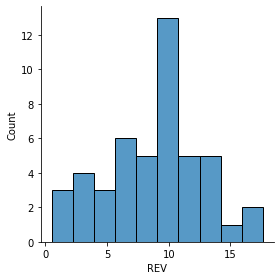

In [4]:
def plot_histogram(col):
  print(f"Min: {df[col].min()} \nMean: {np.round(df[col].mean(),2)} \nMedian: {df[col].median()} \nMax: {df[col].max()}")
  sns.displot(data=df, x=col, bins=10, height=4);

plot_histogram('REV')

Min: 1 
Mean: 5.3 
Median: 5.0 
Max: 9


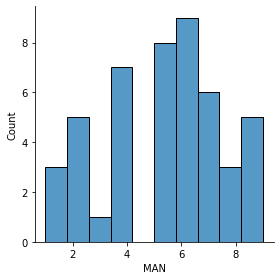

In [5]:
plot_histogram('MAN')

Min: 1 
Mean: 5.74 
Median: 6.0 
Max: 9


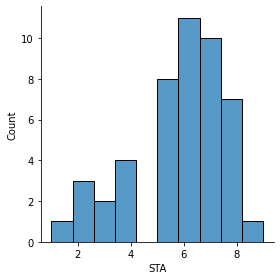

In [6]:
plot_histogram('STA')

Min: 0 
Mean: 0.45 
Median: 0.0 
Max: 1


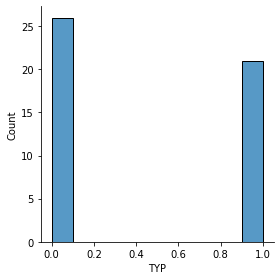

In [7]:
plot_histogram('TYP')

Min: 7.0 
Mean: 10.68 
Median: 10.2 
Max: 16.0


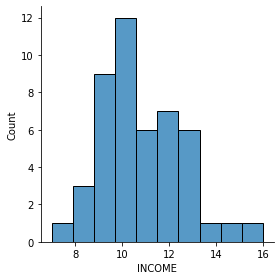

In [8]:
plot_histogram('INCOME')

Min: 0.1 
Mean: 0.64 
Median: 0.67 
Max: 0.98


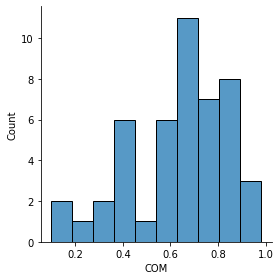

In [9]:
plot_histogram('COM')

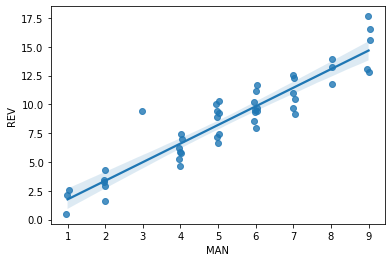

In [10]:
def plot_scatter(col):
  x=col
  y='REV'
  sns.regplot(x=x, y=y, data=df, x_jitter=.05);

plot_scatter('MAN')

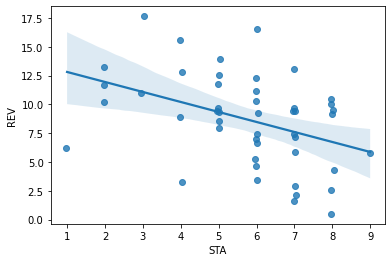

In [11]:
plot_scatter('STA')

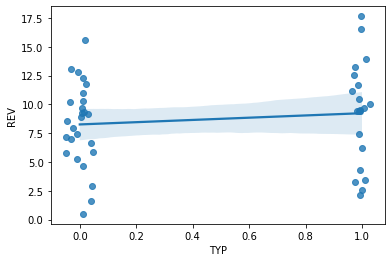

In [12]:
plot_scatter('TYP')

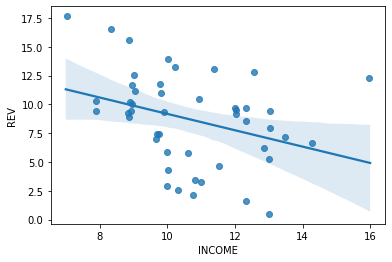

In [13]:
plot_scatter('INCOME')

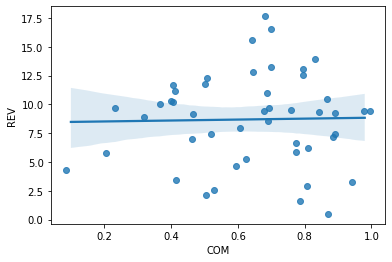

In [14]:
plot_scatter('COM')

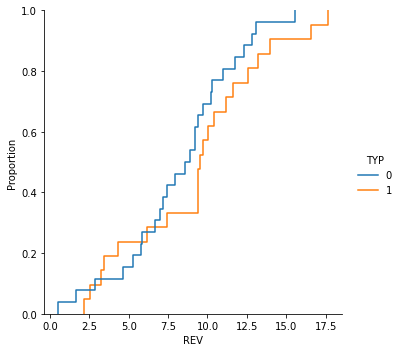

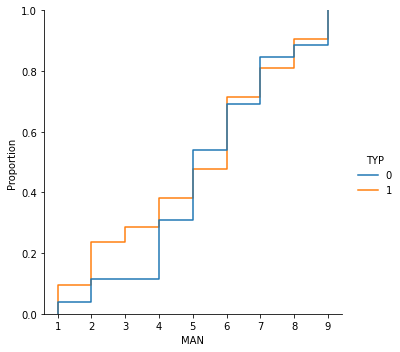

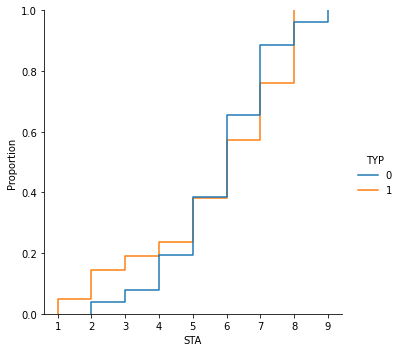

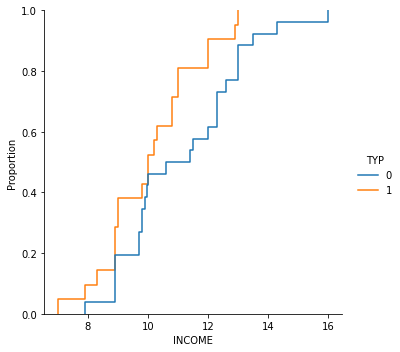

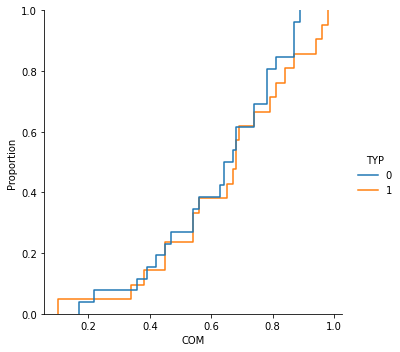

In [15]:
# empirical cumulative density by TYP for all variables
sns.displot(data=df, x="REV", hue="TYP", kind="ecdf");
sns.displot(data=df, x="MAN", hue="TYP", kind="ecdf");
sns.displot(data=df, x="STA", hue="TYP", kind="ecdf");
sns.displot(data=df, x="INCOME", hue="TYP", kind="ecdf");
sns.displot(data=df, x="COM", hue="TYP", kind="ecdf");

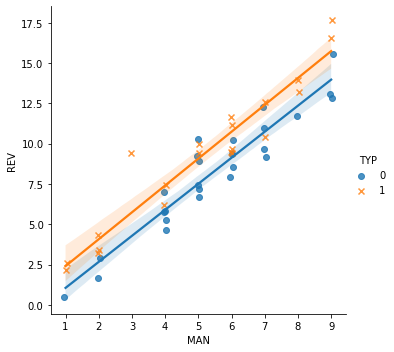

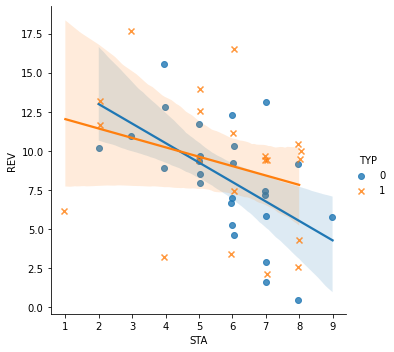

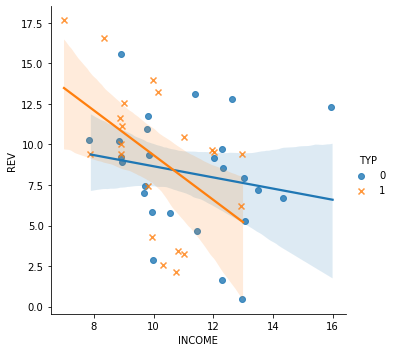

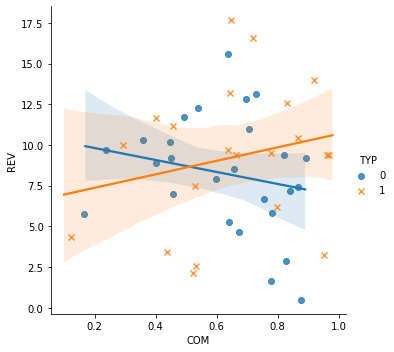

In [16]:
# variables vs REV by TYP
sns.lmplot(x="MAN", y="REV", hue='TYP', data=df, x_jitter=.05, markers=["o", "x"]);
sns.lmplot(x="STA", y="REV", hue='TYP', data=df, x_jitter=.05, markers=["o", "x"]);
sns.lmplot(x="INCOME", y="REV", hue='TYP', data=df, x_jitter=.05, markers=["o", "x"]);
sns.lmplot(x="COM", y="REV", hue='TYP', data=df, x_jitter=.05, markers=["o", "x"]);

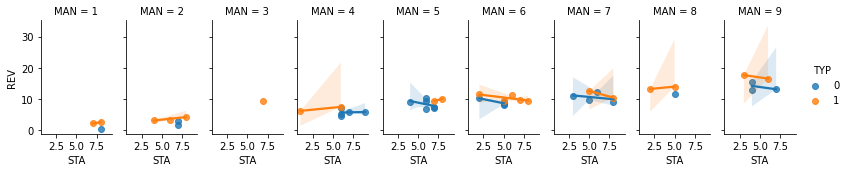

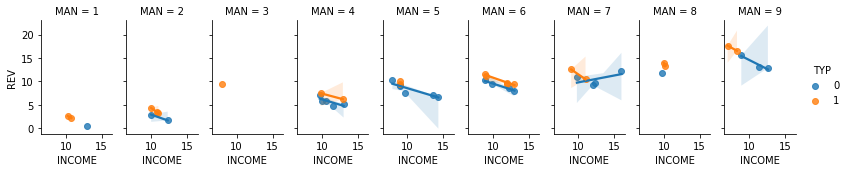

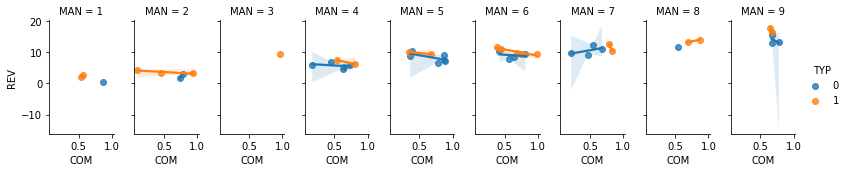

In [17]:
# variables vs REV by TYP & MAN
sns.lmplot(x="STA", y="REV", hue='TYP', col="MAN", data=df, aspect=.5, height=2.5);
sns.lmplot(x="INCOME", y="REV", hue='TYP', col="MAN", data=df, aspect=.5, height=2.5);
sns.lmplot(x="COM", y="REV", hue='TYP', col="MAN", data=df, aspect=.5, height=2.5);

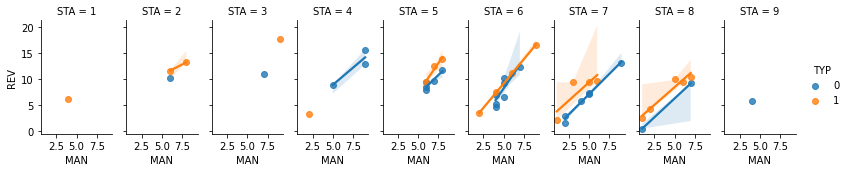

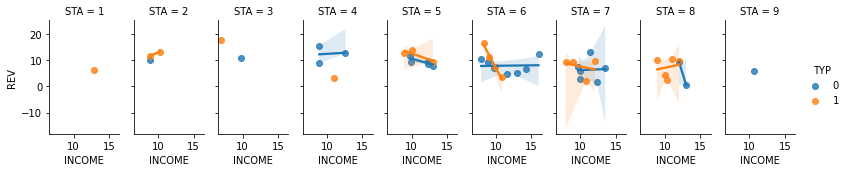

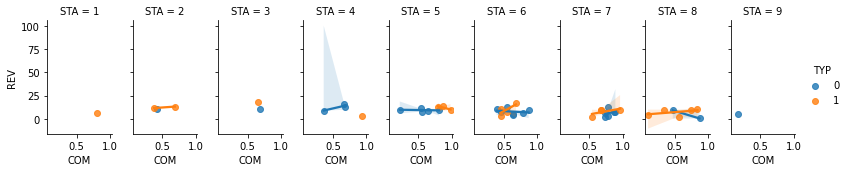

In [18]:
# variables vs REV by TYP & STA
sns.lmplot(x="MAN", y="REV", hue='TYP', col="STA", data=df, aspect=.5, height=2.5);
sns.lmplot(x="INCOME", y="REV", hue='TYP', col="STA", data=df, aspect=.5, height=2.5);
sns.lmplot(x="COM", y="REV", hue='TYP', col="STA", data=df, aspect=.5, height=2.5);

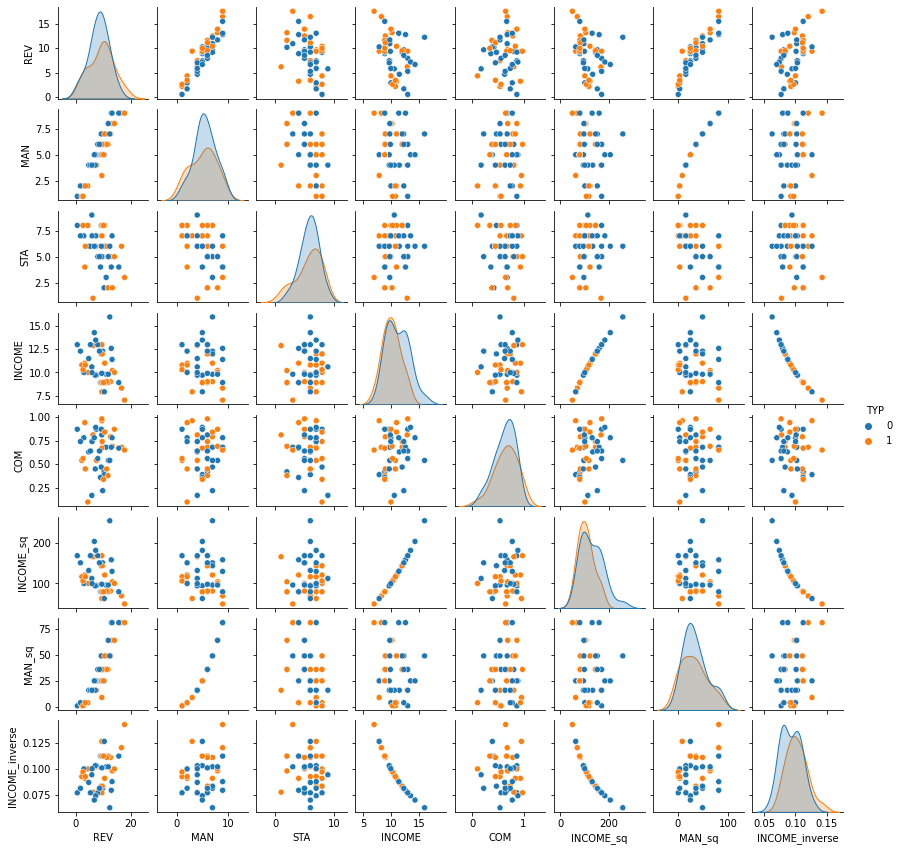

In [19]:
# pairplot of all variables by TYP
sns.pairplot(df, hue="TYP", diag_kind="kde", height=1.5);

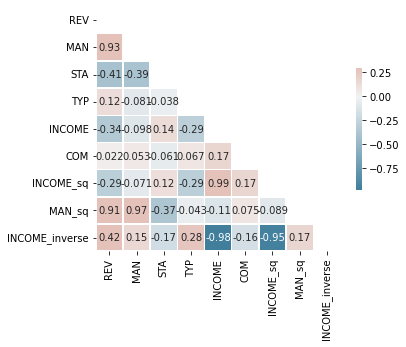

In [20]:
# correlation matrix
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(5.5, 4.5))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [21]:
def linear_regression(df, x_cols, y_sqrt=False):
  X = df[x_cols]

  if y_sqrt:
    Y = np.sqrt(df["REV"])
  else:
    Y = df["REV"]

  X = sm.add_constant(X)

  model = sm.OLS(Y, X).fit()
  predictions = model.predict(X) 

  print_model = model.summary()
  print(print_model)

  df_results = pd.DataFrame({'Actual': Y, 'Predicted': predictions})
  df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

  return df_results


def linear_assumption(df_results):
  """
  Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
  """
  print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
  print('Checking with a scatter plot of actual vs. predicted.',
        'Predictions should follow the diagonal line.')
  sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, height=5)
          
  line_coords = np.arange(df_results.min().min(), df_results.max().max())
  plt.plot(line_coords, line_coords,  # X and y points
            color='darkorange', linestyle='--')
  plt.title('Actual vs. Predicted')
  plt.show()



def normal_errors_assumption(df_results):
  """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
  """ 

  from statsmodels.stats.diagnostic import normal_ad

  print('Assumption 2: The error terms are normally distributed', '\n')
    
  print('Using the Anderson-Darling test for normal distribution')
  p_value = normal_ad(df_results['Residuals'])[1]
  print('p-value from the test - below 0.05 generally means non-normal:', np.round(p_value,4))

  p_value_thresh=0.05
  if p_value < p_value_thresh:
      print('Residuals are not normally distributed')
  else:
      print('Residuals are normally distributed')

  plt.subplots(figsize=(6, 3))
  plt.title('Distribution of Residuals')
  sns.histplot(df_results['Residuals'], kde=True)
  plt.show()

  print()
  if p_value > p_value_thresh:
      print('Assumption satisfied')
  else:
      print('Assumption not satisfied')
      print()
      print('Confidence intervals will likely be affected')
      print('Try performing nonlinear transformations on variables')


def multicollinearity_assumption(df_X):
    """
    Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                       correlation among the predictors, then either remove prepdictors with high
                       Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           
                       This assumption being violated causes issues with interpretability of the 
                       coefficients and the standard errors of the coefficients.
    """
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
        
    # Plotting the heatmap
    plt.figure(figsize = (4,4))
    sns.heatmap(df_X.corr(), annot=True)
    plt.title('Correlation of Variables')
    plt.show()


def autocorrelation_assumption(df_results):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """
    from statsmodels.stats.stattools import durbin_watson
    print('Assumption 4: No Autocorrelation', '\n')
    
    print('\nPerforming Durbin-Watson Test')
    print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
    print('0 to 2< is positive autocorrelation')
    print('>2 to 4 is negative autocorrelation')
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')


def homoscedasticity_assumption(df_results):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    print('Residuals should have relative constant variance')
    plt.subplots(figsize=(6, 4))
    ax = plt.subplot(111)  
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.9)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  
    ax.spines['top'].set_visible(False) 
    plt.title('Residuals')
    plt.show()  

# Model 1
# all variables
df_results = linear_regression(df, x_cols = ['MAN', 'STA', 'TYP', 'INCOME', 'COM'])

                            OLS Regression Results                            
Dep. Variable:                    REV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     157.9
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           1.16e-25
Time:                        13:14:30   Log-Likelihood:                -60.057
No. Observations:                  47   AIC:                             132.1
Df Residuals:                      41   BIC:                             143.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6350      1.134      4.089      0.0

                            OLS Regression Results                            
Dep. Variable:                    REV   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     274.8
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           4.61e-28
Time:                        13:14:30   Log-Likelihood:                -60.159
No. Observations:                  47   AIC:                             128.3
Df Residuals:                      43   BIC:                             135.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3971      0.951      4.623      0.0

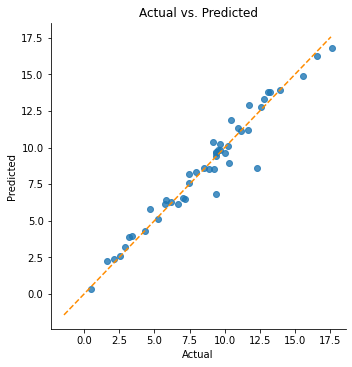

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0001
Residuals are not normally distributed


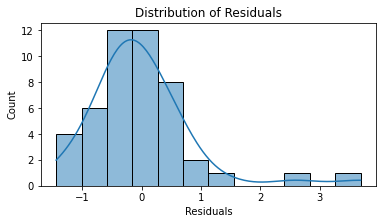


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [22]:
# Model 2
df_results = linear_regression(df, x_cols = ['MAN', 'TYP', 'INCOME'])
linear_assumption(df_results)
normal_errors_assumption(df_results)

                            OLS Regression Results                            
Dep. Variable:                    REV   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     233.0
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           1.32e-26
Time:                        13:14:31   Log-Likelihood:                -63.826
No. Observations:                  47   AIC:                             135.7
Df Residuals:                      43   BIC:                             143.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6638      0.637      2.611      0.0

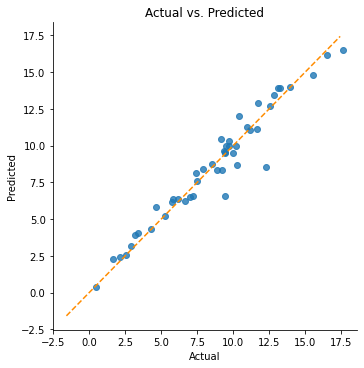

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0001
Residuals are not normally distributed


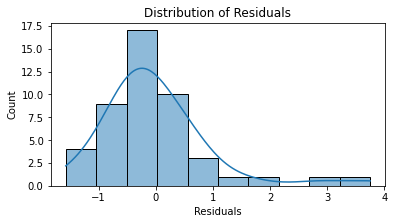


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [23]:
# Model 3
df_results = linear_regression(df, x_cols = ['MAN', 'TYP', 'INCOME_sq'])
linear_assumption(df_results)
normal_errors_assumption(df_results)

                            OLS Regression Results                            
Dep. Variable:                    REV   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     473.1
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           6.17e-33
Time:                        13:14:31   Log-Likelihood:                -47.883
No. Observations:                  47   AIC:                             103.8
Df Residuals:                      43   BIC:                             111.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.5165      2.984      9.220      0.0

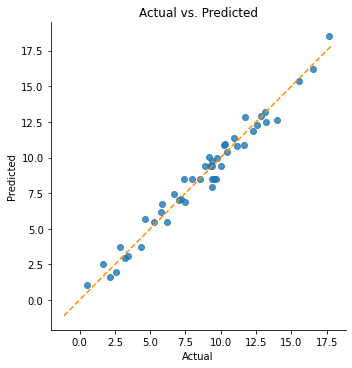

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.4845
Residuals are normally distributed


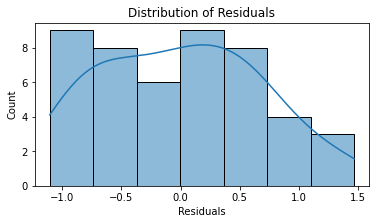


Assumption satisfied
Assumption 3: Little to no multicollinearity among predictors


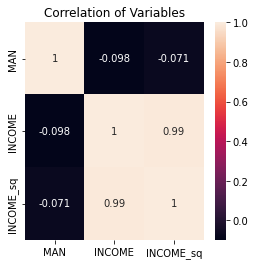

In [24]:
# Model 4
df_results = linear_regression(df, x_cols = ['MAN', 'INCOME', 'INCOME_sq'])
linear_assumption(df_results)
normal_errors_assumption(df_results)
multicollinearity_assumption(df[['MAN', 'INCOME', 'INCOME_sq']])

                            OLS Regression Results                            
Dep. Variable:                    REV   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     397.0
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           2.37e-31
Time:                        13:14:32   Log-Likelihood:                -51.875
No. Observations:                  47   AIC:                             111.8
Df Residuals:                      43   BIC:                             119.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -5.6424      0.678     -8.

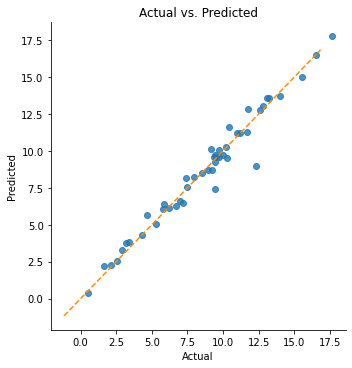

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0
Residuals are not normally distributed


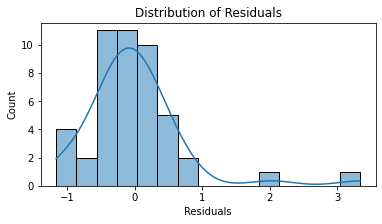


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [25]:
# Model 5
df_results = linear_regression(df, x_cols = ['MAN', 'TYP', "INCOME_inverse"])
linear_assumption(df_results)
normal_errors_assumption(df_results)

                            OLS Regression Results                            
Dep. Variable:                    REV   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     419.1
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           2.26e-29
Time:                        13:14:33   Log-Likelihood:                -60.302
No. Observations:                  47   AIC:                             126.6
Df Residuals:                      44   BIC:                             132.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -5.9104      0.799     -7.

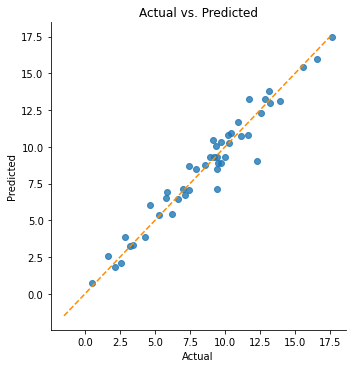

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.0861
Residuals are normally distributed


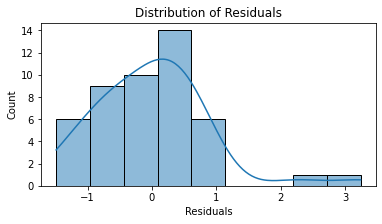


Assumption satisfied
Assumption 3: Little to no multicollinearity among predictors


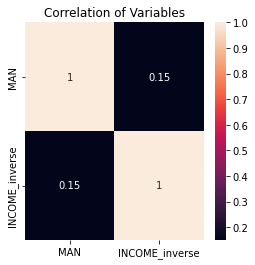

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.228881137311763
Little to no autocorrelation 

Assumption satisfied
Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


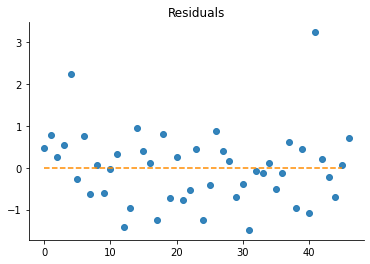

In [26]:
# Model 6
df_results = linear_regression(df, x_cols = ['MAN', 'INCOME_inverse'])
linear_assumption(df_results)
normal_errors_assumption(df_results)
multicollinearity_assumption(df[['MAN', 'INCOME_inverse']])
autocorrelation_assumption(df_results)
homoscedasticity_assumption(df_results)

# Removing outliers

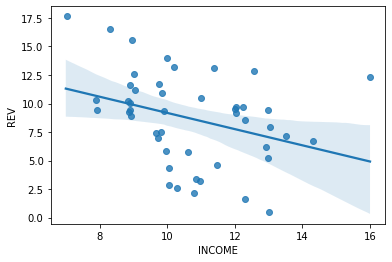

In [27]:
plot_scatter('INCOME')

In [28]:
df1 = df.copy()
print(df1['INCOME'].max())

df1 = df1[df1["INCOME"] != df1["INCOME"].max()].copy()

16.0


In [29]:
df[df["INCOME"] == df["INCOME"].max()]

,REV,MAN,STA,TYP,INCOME,COM,INCOME_sq,MAN_sq,INCOME_inverse
41,12.29,7,6,0,16.0,0.54,256.0,49,0.0625


                            OLS Regression Results                            
Dep. Variable:                    REV   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     618.8
Date:                Sat, 22 Jan 2022   Prob (F-statistic):           2.04e-32
Time:                        13:14:34   Log-Likelihood:                -49.986
No. Observations:                  46   AIC:                             106.0
Df Residuals:                      43   BIC:                             111.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -6.8075      0.684     -9.

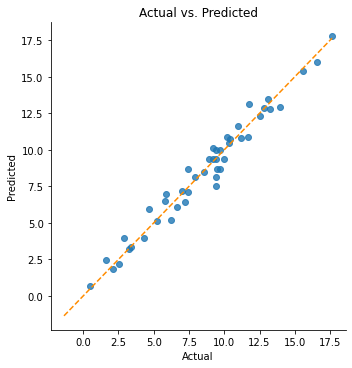

Assumption 2: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 0.9508
Residuals are normally distributed


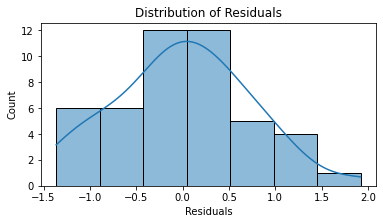


Assumption satisfied
Assumption 3: Little to no multicollinearity among predictors


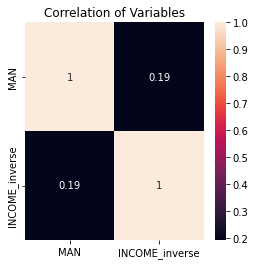

Assumption 4: No Autocorrelation 


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.1691204132637267
Little to no autocorrelation 

Assumption satisfied
Assumption 5: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


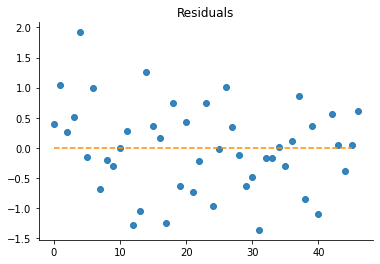

In [30]:
# Model 7

df_results = linear_regression(df1, x_cols = ['MAN', "INCOME_inverse"])
linear_assumption(df_results)
normal_errors_assumption(df_results)
multicollinearity_assumption(df1[['MAN', 'INCOME_inverse']])
autocorrelation_assumption(df_results)
homoscedasticity_assumption(df_results)